##0. PRECONFIGURACIÓN

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!ls

Mounted at /content/drive/
drive  sample_data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%cd'/content/drive/My Drive/BID Ciudades/MicroDatos'
!ls

[Errno 2] No such file or directory: '/content/drive/My Drive/BID Ciudades/MicroDatos'
/content
drive  sample_data


In [4]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

##1. Extracción Datos

Argentina

In [ ]:
from google.colab import data_table
path = '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Argentina/ArgBD2T2017_2021'
dfARG = pd.read_csv(path)
dfARG

,Unnamed: 0,year,quarter,country,city,employs,cod_ciiu,activity,salary
0,0,2017,2,Argentina,LaPlata,0,0.0,SinEspecificar,5900.0
1,1,2017,2,Argentina,LaPlata,0,0.0,SinEspecificar,5900.0
2,2,2017,2,Argentina,LaPlata,504,4502.0,Comercio,10000.0
3,3,2017,2,Argentina,LaPlata,0,0.0,SinEspecificar,1900.0
4,4,2017,2,Argentina,LaPlata,504,4000.0,Construcción,14000.0
...,...,...,...,...,...,...,...,...,...
261060,261060,2021,2,Argentina,BsAs,250,9999.0,Extraterritoriales,732000.0
261061,261061,2021,2,Argentina,BsAs,250,4804.0,Comercio,55000.0
261062,261062,2021,2,Argentina,BsAs,250,8200.0,Administrativas,50000.0
261063,261063,2021,2,Argentina,BsAs,250,9999.0,Extraterritoriales,360000.0


México

In [ ]:
path = '/content/drive/Shareddrives/BID/Ciudades/MicroDatos/Mexico/MexBD2T2017_2021'
dfMEX = pd.read_csv(path)
dfMEX

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,year,quarter,country,city,employs,cod_ciiu,activity,salary
0,0,2017,2,México,CDMX,648.0,8121,servicios,
1,1,2017,2,México,CDMX,0.0,0,noespecificado,
2,2,2017,2,México,CDMX,648.0,5411,servicios,8
3,3,2017,2,México,CDMX,0.0,0,noespecificado,
4,4,2017,2,México,CDMX,648.0,8130,servicios,8
...,...,...,...,...,...,...,...,...,...
1252664,1252664,2021,2,México,Chiapas,46.0,6222,servicios,
1252665,1252665,2021,2,México,Chiapas,0.0,,noespecificado,
1252666,1252666,2021,2,México,Chiapas,46.0,8121,servicios,3
1252667,1252667,2021,2,México,Chiapas,46.0,8121,servicios,2


##2. Transformación y limpieza para cálculos

México total por año

In [ ]:
TotalOcupadosMex = dfMEX.groupby('year').sum()
TotalOcupadosMex

,Unnamed: 0,quarter,employs
year,,,
2017,48682140528,624066,50592641.0
2018,144540666600,619230,52126045.0
2019,253475404678,647098,53304080.0
2021,337890973640,614944,53353257.0


In [ ]:
TotalOcupadosMex2017_2021 = TotalOcupadosMex.loc[:,['employs']]
TotalOcupadosMex2017_2021

,employs
year,
2017,50592641.0
2018,52126045.0
2019,53304080.0
2021,53353257.0


In [ ]:
OcuTotalNalMx = TotalOcupadosMex2017_2021.rename(columns={"employs": "TotalMx"})
OcuTotalNalMx

,TotalMx
year,
2017,50592641.0
2018,52126045.0
2019,53304080.0
2021,53353257.0


Ciudades mexicanas total por año

In [ ]:
dfCiudadesMx = dfMEX.groupby(['year', 'city', 'activity'], as_index=False)['employs'].sum()
dfCiudadesMx

,year,city,activity,employs
0,2017,Aguascalientes,agricultura,26303.0
1,2017,Aguascalientes,comercio,100686.0
2,2017,Aguascalientes,construccion,43134.0
3,2017,Aguascalientes,industria,133370.0
4,2017,Aguascalientes,noespecificado,1181.0
...,...,...,...,...
891,2021,Zacatecas,construccion,60550.0
892,2021,Zacatecas,industria,74918.0
893,2021,Zacatecas,noespecificado,1644.0
894,2021,Zacatecas,otrosservicios,9653.0


In [ ]:
dfMxCitiesDepured = dfCiudadesMx.pivot_table(index='year', columns='city', values='employs', aggfunc=np.sum).reset_index()
dfMxCitiesDepured

city,year,Aguascalientes,BajaCalifornia,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán,Morelos,México,Nayarit,NuevoLeón,Oaxaca,Puebla,Querétaro,QuintanaRoo,SanLuisPotosí,SinDefinir,Sinaloa,Sonora,SurBajaCalifornia,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
0,2017,541033.0,1588871.0,3977336.0,381246.0,1871503.0,1600685.0,1245045.0,338855.0,709259.0,2349418.0,1440769.0,1103485.0,3524236.0,1905849.0,749611.0,7102273.0,532653.0,2244440.0,1595111.0,2602125.0,748394.0,750669.0,1117071.0,NaN,1318182.0,1307252.0,360974.0,867424.0,1491118.0,520095.0,3104908.0,991642.0,611109.0
1,2018,549752.0,1631821.0,4138067.0,397115.0,1870233.0,1639119.0,1283527.0,354390.0,745450.0,2511651.0,1424314.0,1195044.0,3574781.0,1980099.0,754377.0,7334142.0,554446.0,2337592.0,1675856.0,2620563.0,814091.0,786875.0,1143542.0,NaN,1299780.0,1331271.0,382903.0,913819.0,1553687.0,530409.0,3166911.0,1020839.0,609579.0
2,2019,558112.0,1674034.0,4171845.0,404165.0,2036978.0,1654307.0,1283881.0,361033.0,737884.0,2479643.0,1499303.0,1228859.0,3672825.0,2011399.0,751470.0,7510333.0,564787.0,2348586.0,1742827.0,2711830.0,800525.0,828336.0,1155927.0,NaN,1328674.0,1348352.0,401624.0,956708.0,1599860.0,548639.0,3288230.0,1017455.0,625649.0
3,2021,603844.0,1702332.0,3947880.0,410122.0,2202581.0,1617921.0,1340204.0,350383.0,760327.0,2568662.0,1473376.0,1268074.0,3779308.0,2007975.0,801632.0,NaN,579149.0,2628855.0,1740309.0,2777330.0,968680.0,824462.0,1161834.0,7004496.0,1304753.0,1310352.0,392468.0,872037.0,1509901.0,549972.0,3155545.0,1100711.0,637782.0


In [ ]:
dfestadomexico = dfMxCitiesDepured.loc[:,['year', 'México', 'SinDefinir']]
dfestadomexico 

city,year,México,SinDefinir
0,2017,7102273.0,NaN
1,2018,7334142.0,NaN
2,2019,7510333.0,NaN
3,2021,NaN,7004496.0


In [ ]:
dfestadomexico1 = dfestadomexico.fillna(0)
dfestadomexico1

city,year,México,SinDefinir
0,2017,7102273.0,0.0
1,2018,7334142.0,0.0
2,2019,7510333.0,0.0
3,2021,0.0,7004496.0


In [ ]:
dfestadomexico2 = pd.DataFrame(dfestadomexico1['México']+dfestadomexico1['SinDefinir'])
dfestadomexico3 = dfestadomexico2.rename(columns={0: "EstadoMéxico"})
year=['2017', '2018', '2019', '2021']
dfestadomexico4 = dfestadomexico3.assign(year=[2017, 2018, 2019, 2021])
dfestadomexico4

,EstadoMéxico,year
0,7102273.0,2017
1,7334142.0,2018
2,7510333.0,2019
3,7004496.0,2021


In [ ]:
dfcitiesconestadomexico = dfMxCitiesDepured.merge(dfestadomexico4)
dfcitiesconestadomexico

,year,Aguascalientes,BajaCalifornia,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán,Morelos,México,Nayarit,NuevoLeón,Oaxaca,Puebla,Querétaro,QuintanaRoo,SanLuisPotosí,SinDefinir,Sinaloa,Sonora,SurBajaCalifornia,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas,EstadoMéxico
0,2017,541033.0,1588871.0,3977336.0,381246.0,1871503.0,1600685.0,1245045.0,338855.0,709259.0,2349418.0,1440769.0,1103485.0,3524236.0,1905849.0,749611.0,7102273.0,532653.0,2244440.0,1595111.0,2602125.0,748394.0,750669.0,1117071.0,NaN,1318182.0,1307252.0,360974.0,867424.0,1491118.0,520095.0,3104908.0,991642.0,611109.0,7102273.0
1,2018,549752.0,1631821.0,4138067.0,397115.0,1870233.0,1639119.0,1283527.0,354390.0,745450.0,2511651.0,1424314.0,1195044.0,3574781.0,1980099.0,754377.0,7334142.0,554446.0,2337592.0,1675856.0,2620563.0,814091.0,786875.0,1143542.0,NaN,1299780.0,1331271.0,382903.0,913819.0,1553687.0,530409.0,3166911.0,1020839.0,609579.0,7334142.0
2,2019,558112.0,1674034.0,4171845.0,404165.0,2036978.0,1654307.0,1283881.0,361033.0,737884.0,2479643.0,1499303.0,1228859.0,3672825.0,2011399.0,751470.0,7510333.0,564787.0,2348586.0,1742827.0,2711830.0,800525.0,828336.0,1155927.0,NaN,1328674.0,1348352.0,401624.0,956708.0,1599860.0,548639.0,3288230.0,1017455.0,625649.0,7510333.0
3,2021,603844.0,1702332.0,3947880.0,410122.0,2202581.0,1617921.0,1340204.0,350383.0,760327.0,2568662.0,1473376.0,1268074.0,3779308.0,2007975.0,801632.0,NaN,579149.0,2628855.0,1740309.0,2777330.0,968680.0,824462.0,1161834.0,7004496.0,1304753.0,1310352.0,392468.0,872037.0,1509901.0,549972.0,3155545.0,1100711.0,637782.0,7004496.0


In [ ]:
dfMxNal_Ciudades = pd.merge(OcuTotalNalMx, dfcitiesconestadomexico, on='year')
dfMxNal_Ciudades

,year,TotalMx,Aguascalientes,BajaCalifornia,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán,Morelos,México,Nayarit,NuevoLeón,Oaxaca,Puebla,Querétaro,QuintanaRoo,SanLuisPotosí,SinDefinir,Sinaloa,Sonora,SurBajaCalifornia,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas,EstadoMéxico
0,2017,50592641.0,541033.0,1588871.0,3977336.0,381246.0,1871503.0,1600685.0,1245045.0,338855.0,709259.0,2349418.0,1440769.0,1103485.0,3524236.0,1905849.0,749611.0,7102273.0,532653.0,2244440.0,1595111.0,2602125.0,748394.0,750669.0,1117071.0,NaN,1318182.0,1307252.0,360974.0,867424.0,1491118.0,520095.0,3104908.0,991642.0,611109.0,7102273.0
1,2018,52126045.0,549752.0,1631821.0,4138067.0,397115.0,1870233.0,1639119.0,1283527.0,354390.0,745450.0,2511651.0,1424314.0,1195044.0,3574781.0,1980099.0,754377.0,7334142.0,554446.0,2337592.0,1675856.0,2620563.0,814091.0,786875.0,1143542.0,NaN,1299780.0,1331271.0,382903.0,913819.0,1553687.0,530409.0,3166911.0,1020839.0,609579.0,7334142.0
2,2019,53304080.0,558112.0,1674034.0,4171845.0,404165.0,2036978.0,1654307.0,1283881.0,361033.0,737884.0,2479643.0,1499303.0,1228859.0,3672825.0,2011399.0,751470.0,7510333.0,564787.0,2348586.0,1742827.0,2711830.0,800525.0,828336.0,1155927.0,NaN,1328674.0,1348352.0,401624.0,956708.0,1599860.0,548639.0,3288230.0,1017455.0,625649.0,7510333.0
3,2021,53353257.0,603844.0,1702332.0,3947880.0,410122.0,2202581.0,1617921.0,1340204.0,350383.0,760327.0,2568662.0,1473376.0,1268074.0,3779308.0,2007975.0,801632.0,NaN,579149.0,2628855.0,1740309.0,2777330.0,968680.0,824462.0,1161834.0,7004496.0,1304753.0,1310352.0,392468.0,872037.0,1509901.0,549972.0,3155545.0,1100711.0,637782.0,7004496.0


Total nacional por sectores

In [ ]:
TotalOcupadosMex = dfMEX.groupby(['year', 'activity'], as_index=False).sum()
TotalOcupadosMex
TotalOcupadosMex2017_2021 = TotalOcupadosMex.loc[:,['year','employs', 'activity']]
TotalOcupadosMex2017_2021

,year,employs,activity
0,2017,6626125.0,agricultura
1,2017,9336910.0,comercio
2,2017,4152626.0,construccion
3,2017,8441324.0,industria
4,2017,292544.0,noespecificado
5,2017,392335.0,otrosservicios
6,2017,21350777.0,servicios
7,2018,6627389.0,agricultura
8,2018,9801168.0,comercio
9,2018,4348717.0,construccion


Total regional por sectores

In [ ]:
Total_city_sector_Mex = dfMEX.groupby(['year','city', 'activity'], as_index=False).sum()
Total_city_sector_Mex

,year,city,activity,Unnamed: 0,quarter,employs
0,2017,Aguascalientes,agricultura,75254382,598,26303.0
1,2017,Aguascalientes,comercio,119728915,1796,100686.0
2,2017,Aguascalientes,construccion,69609179,818,43134.0
3,2017,Aguascalientes,industria,195445064,2442,133370.0
4,2017,Aguascalientes,noespecificado,718460645,8946,1181.0
...,...,...,...,...,...,...
891,2021,Zacatecas,construccion,443729951,798,60550.0
892,2021,Zacatecas,industria,602212646,1086,74918.0
893,2021,Zacatecas,noespecificado,4734511285,8502,1644.0
894,2021,Zacatecas,otrosservicios,101546379,182,9653.0


In [ ]:
Total_city_sector_Mex_2017_2021 = Total_city_sector_Mex.loc[:,['year','city','employs', 'activity']]
Total_city_sector_Mex_2017_2021

,year,city,employs,activity
0,2017,Aguascalientes,26303.0,agricultura
1,2017,Aguascalientes,100686.0,comercio
2,2017,Aguascalientes,43134.0,construccion
3,2017,Aguascalientes,133370.0,industria
4,2017,Aguascalientes,1181.0,noespecificado
...,...,...,...,...
891,2021,Zacatecas,60550.0,construccion
892,2021,Zacatecas,74918.0,industria
893,2021,Zacatecas,1644.0,noespecificado
894,2021,Zacatecas,9653.0,otrosservicios


Argentina

Total nacional argentina

In [ ]:
TotalOcupadosAr = dfARG.groupby('year').sum()
TotalOcupadosAr

,Unnamed: 0,quarter,employs,cod_ciiu,salary
year,,,,,
2017,1785300135,119510,11394821,150568243.0,353445149.0
2018,5128345120,115670,11642340,148096607.0,446717932.0
2019,8723873873,118516,12073393,153067561.0,648494709.0
2020,7256094082,74264,9546080,80924066.0,517351238.0
2021,11183723370,94170,11981480,120738665.0,942380462.0


In [ ]:
TotalOcupadosARG2017_2021 = TotalOcupadosAr.loc[:,['employs']]
TotalOcupadosARG2017_2021

,employs
year,
2017,11394821
2018,11642340
2019,12073393
2020,9546080
2021,11981480


In [ ]:
TotalOcupadosARG2017_2021 = TotalOcupadosARG2017_2021.rename(columns={"employs": "TotalARG"})
TotalOcupadosARG2017_2021

,TotalARG
year,
2017,11394821
2018,11642340
2019,12073393
2020,9546080
2021,11981480


Ciudades argentinas total por año y total nacional

In [ ]:
dfCiudadesArg = dfARG.groupby(['year', 'city', 'activity'], as_index=False)['employs'].sum()
dfCiudadesArg

,year,city,activity,employs
0,2017,BahíaBlanca,AdminPública,8406
1,2017,BahíaBlanca,Administrativas,3478
2,2017,BahíaBlanca,Agricultura,1360
3,2017,BahíaBlanca,AguaYSaneamiento,485
4,2017,BahíaBlanca,AlojamientoYComidas,3123
...,...,...,...,...
3353,2021,Viedma,Otras,776
3354,2021,Viedma,Profesionales,775
3355,2021,Viedma,Salud,2220
3356,2021,Viedma,SinEspecificar,0


In [ ]:
dfARGCitiesDepured = dfCiudadesArg.pivot_table(index='year', columns='city', values='employs', aggfunc=np.sum).reset_index()
dfARGCitiesDepured

city,year,BahíaBlanca,BsAs,Catamarca,Concordia,Corrientes,Córdoba,Estero,Formosa,Gallegos,Jujuy,LaPlata,MarDelPlata,Mendoza,Neuquén,Paraná,PartidosdelGBA,Posadas,Rawson,Resistencia,Rioja,Rivadavia,Rosario,RíoCuarto,Salta,SanJuan,SanLuis,SanNicolás,SantaFé,SantaRosa,Tucumán,Ushuaia,Viedma
0,2017,127799,1501606,91079,40896,150965,641877,140439,78779,48333,146274,357286,251044,380740,118741,95436,4770340,142348,58216,144536,83162,80182,556991,73180,255439,198736,88075,70097,206608,47091,353053,63090,32383
1,2018,134390,1471510,87914,39264,153702,664594,144246,78855,49499,142583,347559,272862,391411,135074,91051,4924832,160539,58032,151932,84038,86640,569941,74092,254516,191011,100338,74777,200413,46254,358790,65800,35881
2,2019,137082,1561358,84601,55997,150484,657195,160637,83485,51081,149791,390738,271665,436960,138552,119720,5095940,156463,59926,142307,90334,85580,558847,78960,260732,205233,98934,73349,202361,50899,366855,65360,31967
3,2020,107669,1245830,78416,55129,122865,548914,131149,71776,45654,128543,316376,184594,384354,103901,93432,3786573,143200,57529,150523,82456,71927,467058,66722,213612,182793,89081,56243,162533,42147,278790,46325,29966
4,2021,132721,1418720,87417,59788,151859,671936,165173,82284,47853,153992,388638,250415,487233,124699,123120,5005406,172315,57557,164025,97900,92647,585221,75688,269624,218035,102855,72109,224613,51202,342622,71252,32561


In [ ]:
dfArgNal_Ciudades = pd.merge(TotalOcupadosARG2017_2021, dfARGCitiesDepured, on='year')
dfArgNal_Ciudades

,year,TotalARG,BahíaBlanca,BsAs,Catamarca,Concordia,Corrientes,Córdoba,Estero,Formosa,Gallegos,Jujuy,LaPlata,MarDelPlata,Mendoza,Neuquén,Paraná,PartidosdelGBA,Posadas,Rawson,Resistencia,Rioja,Rivadavia,Rosario,RíoCuarto,Salta,SanJuan,SanLuis,SanNicolás,SantaFé,SantaRosa,Tucumán,Ushuaia,Viedma
0,2017,11394821,127799,1501606,91079,40896,150965,641877,140439,78779,48333,146274,357286,251044,380740,118741,95436,4770340,142348,58216,144536,83162,80182,556991,73180,255439,198736,88075,70097,206608,47091,353053,63090,32383
1,2018,11642340,134390,1471510,87914,39264,153702,664594,144246,78855,49499,142583,347559,272862,391411,135074,91051,4924832,160539,58032,151932,84038,86640,569941,74092,254516,191011,100338,74777,200413,46254,358790,65800,35881
2,2019,12073393,137082,1561358,84601,55997,150484,657195,160637,83485,51081,149791,390738,271665,436960,138552,119720,5095940,156463,59926,142307,90334,85580,558847,78960,260732,205233,98934,73349,202361,50899,366855,65360,31967
3,2020,9546080,107669,1245830,78416,55129,122865,548914,131149,71776,45654,128543,316376,184594,384354,103901,93432,3786573,143200,57529,150523,82456,71927,467058,66722,213612,182793,89081,56243,162533,42147,278790,46325,29966
4,2021,11981480,132721,1418720,87417,59788,151859,671936,165173,82284,47853,153992,388638,250415,487233,124699,123120,5005406,172315,57557,164025,97900,92647,585221,75688,269624,218035,102855,72109,224613,51202,342622,71252,32561


Total anual ciudades por sectores

In [ ]:
dfCiudadesArg = dfARG.groupby(['year', 'city', 'activity'], as_index=False)['employs'].sum()
dfCiudadesArg

,year,city,activity,employs
0,2017,BahíaBlanca,AdminPública,8406
1,2017,BahíaBlanca,Administrativas,3478
2,2017,BahíaBlanca,Agricultura,1360
3,2017,BahíaBlanca,AguaYSaneamiento,485
4,2017,BahíaBlanca,AlojamientoYComidas,3123
...,...,...,...,...
3353,2021,Viedma,Otras,776
3354,2021,Viedma,Profesionales,775
3355,2021,Viedma,Salud,2220
3356,2021,Viedma,SinEspecificar,0


##3. Cálculos ShifShare

Argentina general

In [ ]:
dfArgNal_Ciudades

,year,TotalARG,BahíaBlanca,BsAs,Catamarca,Concordia,Corrientes,Córdoba,Estero,Formosa,Gallegos,Jujuy,LaPlata,MarDelPlata,Mendoza,Neuquén,Paraná,PartidosdelGBA,Posadas,Rawson,Resistencia,Rioja,Rivadavia,Rosario,RíoCuarto,Salta,SanJuan,SanLuis,SanNicolás,SantaFé,SantaRosa,Tucumán,Ushuaia,Viedma
0,2017,11394821,127799,1501606,91079,40896,150965,641877,140439,78779,48333,146274,357286,251044,380740,118741,95436,4770340,142348,58216,144536,83162,80182,556991,73180,255439,198736,88075,70097,206608,47091,353053,63090,32383
1,2018,11642340,134390,1471510,87914,39264,153702,664594,144246,78855,49499,142583,347559,272862,391411,135074,91051,4924832,160539,58032,151932,84038,86640,569941,74092,254516,191011,100338,74777,200413,46254,358790,65800,35881
2,2019,12073393,137082,1561358,84601,55997,150484,657195,160637,83485,51081,149791,390738,271665,436960,138552,119720,5095940,156463,59926,142307,90334,85580,558847,78960,260732,205233,98934,73349,202361,50899,366855,65360,31967
3,2020,9546080,107669,1245830,78416,55129,122865,548914,131149,71776,45654,128543,316376,184594,384354,103901,93432,3786573,143200,57529,150523,82456,71927,467058,66722,213612,182793,89081,56243,162533,42147,278790,46325,29966
4,2021,11981480,132721,1418720,87417,59788,151859,671936,165173,82284,47853,153992,388638,250415,487233,124699,123120,5005406,172315,57557,164025,97900,92647,585221,75688,269624,218035,102855,72109,224613,51202,342622,71252,32561


Argentina 2017 Vs 2021

In [ ]:
df_ss_17vs21 = dfArgNal_Ciudades.transpose()
df_ss_17vs21

,0,1,2,3,4
year,2017,2018,2019,2020,2021
TotalARG,11394821,11642340,12073393,9546080,11981480
BahíaBlanca,127799,134390,137082,107669,132721
BsAs,1501606,1471510,1561358,1245830,1418720
Catamarca,91079,87914,84601,78416,87417
Concordia,40896,39264,55997,55129,59788
Corrientes,150965,153702,150484,122865,151859
Córdoba,641877,664594,657195,548914,671936
Estero,140439,144246,160637,131149,165173
Formosa,78779,78855,83485,71776,82284


Argentina Variaciones y crecimientos 2017 Vs 2021

In [ ]:
#diferencia 2021 - 2017
df_ss_17vs21a = pd.DataFrame(df_ss_17vs21[4]-df_ss_17vs21[0])
df_ss_17vs21a

,0
year,4
TotalARG,586659
BahíaBlanca,4922
BsAs,-82886
Catamarca,-3662
Concordia,18892
Corrientes,894
Córdoba,30059
Estero,24734
Formosa,3505


In [ ]:
df_ss_17vs21b = df_ss_17vs21a.rename(columns={0: "var2021_2017"})
df_ss_17vs21b

,var2021_2017
year,4
TotalARG,586659
BahíaBlanca,4922
BsAs,-82886
Catamarca,-3662
Concordia,18892
Corrientes,894
Córdoba,30059
Estero,24734
Formosa,3505


In [ ]:
df_ss_17vs21c = pd.DataFrame((df_ss_17vs21[4]/df_ss_17vs21[0])-1)
df_ss_17vs21c = df_ss_17vs21c.rename(columns={0: "growth2017_2021"}) 
df_ss_17vs21c

,growth2017_2021
year,0.001983
TotalARG,0.051485
BahíaBlanca,0.038514
BsAs,-0.055198
Catamarca,-0.040207
Concordia,0.461952
Corrientes,0.005922
Córdoba,0.046830
Estero,0.176119
Formosa,0.044492


El National Share de Argentina entre 2017 y 2021 fue de 5,14%

México

In [ ]:
dfMxNal_Ciudades

,year,TotalMx,Aguascalientes,BajaCalifornia,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán,Morelos,México,Nayarit,NuevoLeón,Oaxaca,Puebla,Querétaro,QuintanaRoo,SanLuisPotosí,SinDefinir,Sinaloa,Sonora,SurBajaCalifornia,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas,EstadoMéxico
0,2017,50592641.0,541033.0,1588871.0,3977336.0,381246.0,1871503.0,1600685.0,1245045.0,338855.0,709259.0,2349418.0,1440769.0,1103485.0,3524236.0,1905849.0,749611.0,7102273.0,532653.0,2244440.0,1595111.0,2602125.0,748394.0,750669.0,1117071.0,NaN,1318182.0,1307252.0,360974.0,867424.0,1491118.0,520095.0,3104908.0,991642.0,611109.0,7102273.0
1,2018,52126045.0,549752.0,1631821.0,4138067.0,397115.0,1870233.0,1639119.0,1283527.0,354390.0,745450.0,2511651.0,1424314.0,1195044.0,3574781.0,1980099.0,754377.0,7334142.0,554446.0,2337592.0,1675856.0,2620563.0,814091.0,786875.0,1143542.0,NaN,1299780.0,1331271.0,382903.0,913819.0,1553687.0,530409.0,3166911.0,1020839.0,609579.0,7334142.0
2,2019,53304080.0,558112.0,1674034.0,4171845.0,404165.0,2036978.0,1654307.0,1283881.0,361033.0,737884.0,2479643.0,1499303.0,1228859.0,3672825.0,2011399.0,751470.0,7510333.0,564787.0,2348586.0,1742827.0,2711830.0,800525.0,828336.0,1155927.0,NaN,1328674.0,1348352.0,401624.0,956708.0,1599860.0,548639.0,3288230.0,1017455.0,625649.0,7510333.0
3,2021,53353257.0,603844.0,1702332.0,3947880.0,410122.0,2202581.0,1617921.0,1340204.0,350383.0,760327.0,2568662.0,1473376.0,1268074.0,3779308.0,2007975.0,801632.0,NaN,579149.0,2628855.0,1740309.0,2777330.0,968680.0,824462.0,1161834.0,7004496.0,1304753.0,1310352.0,392468.0,872037.0,1509901.0,549972.0,3155545.0,1100711.0,637782.0,7004496.0


In [ ]:
dfmxnational_share = dfMxNal_Ciudades.transpose()
dfmxnational_share

,0,1,2,3
year,2017.0,2018.0,2019.0,2021.0
TotalMx,50592641.0,52126045.0,53304080.0,53353257.0
Aguascalientes,541033.0,549752.0,558112.0,603844.0
BajaCalifornia,1588871.0,1631821.0,1674034.0,1702332.0
CDMX,3977336.0,4138067.0,4171845.0,3947880.0
Campeche,381246.0,397115.0,404165.0,410122.0
Chiapas,1871503.0,1870233.0,2036978.0,2202581.0
Chihuahua,1600685.0,1639119.0,1654307.0,1617921.0
Coahuila,1245045.0,1283527.0,1283881.0,1340204.0
Colima,338855.0,354390.0,361033.0,350383.0


In [ ]:
#diferencia 2021 - 2017
df_mx_ns_17vs21 = pd.DataFrame(dfmxnational_share[3]-dfmxnational_share[0])
df_mx_ns_17vs21

,0
year,4.0
TotalMx,2760616.0
Aguascalientes,62811.0
BajaCalifornia,113461.0
CDMX,-29456.0
Campeche,28876.0
Chiapas,331078.0
Chihuahua,17236.0
Coahuila,95159.0
Colima,11528.0


In [ ]:
df_mx_ns_17vs21a = df_mx_ns_17vs21.rename(columns={0: "var2021_2017"})
df_mx_ns_17vs21a 

,var2021_2017
year,4.0
TotalMx,2760616.0
Aguascalientes,62811.0
BajaCalifornia,113461.0
CDMX,-29456.0
Campeche,28876.0
Chiapas,331078.0
Chihuahua,17236.0
Coahuila,95159.0
Colima,11528.0


In [ ]:
#crecimiento 2021 - 2017
df_mx_ns_17vs21b = pd.DataFrame((dfmxnational_share[3]/dfmxnational_share[0])-1)
df_mx_ns_17vs21c = df_mx_ns_17vs21b.rename(columns={0: "growth2017_2021"}) 
df_mx_ns_17vs21c

,growth2017_2021
year,0.001983
TotalMx,0.054566
Aguascalientes,0.116095
BajaCalifornia,0.071410
CDMX,-0.007406
Campeche,0.075741
Chiapas,0.176905
Chihuahua,0.010768
Coahuila,0.076430
Colima,0.034020


El National Share de México entre 2017 y 2021 fue de 5,45%

Cálculo de Regional Share para las regiones de Argentina

In [ ]:
dfCiudadesArg = dfARG.groupby(['year', 'city', 'activity'], as_index=False)['employs'].sum()
dfCiudadesArg

,year,city,activity,employs
0,2017,BahíaBlanca,AdminPública,8406
1,2017,BahíaBlanca,Administrativas,3478
2,2017,BahíaBlanca,Agricultura,1360
3,2017,BahíaBlanca,AguaYSaneamiento,485
4,2017,BahíaBlanca,AlojamientoYComidas,3123
...,...,...,...,...
3353,2021,Viedma,Otras,776
3354,2021,Viedma,Profesionales,775
3355,2021,Viedma,Salud,2220
3356,2021,Viedma,SinEspecificar,0


In [ ]:
df_bs_as = dfCiudadesArg['city']=='BsAs'
bs_as = dfCiudadesArg[df_bs_as]
bs_as.tail(30)

,year,city,activity,employs
2063,2020,BsAs,Industria,107600
2064,2020,BsAs,InformaciónYComunicaciones,89884
2065,2020,BsAs,Inmobiliarias,16255
2066,2020,BsAs,Minas,11434
2067,2020,BsAs,Otras,84266
2068,2020,BsAs,Profesionales,118293
2069,2020,BsAs,Salud,101302
2070,2020,BsAs,SinEspecificar,0
2071,2020,BsAs,Transporte,34005
2708,2021,BsAs,AdminPública,118135


In [ ]:
df_gran_bs_as = dfCiudadesArg['city']=='PartidosdelGBA'
gran_bs_as = dfCiudadesArg[df_gran_bs_as]
gran_bs_as.head(25)

,year,city,activity,employs
316,2017,PartidosdelGBA,AdminPública,298295
317,2017,PartidosdelGBA,Administrativas,206392
318,2017,PartidosdelGBA,Agricultura,17934
319,2017,PartidosdelGBA,AguaYSaneamiento,22725
320,2017,PartidosdelGBA,AlojamientoYComidas,169387
321,2017,PartidosdelGBA,Artes,62689
322,2017,PartidosdelGBA,Comercio,887972
323,2017,PartidosdelGBA,Construcción,428913
324,2017,PartidosdelGBA,Electricidad,15852
325,2017,PartidosdelGBA,Enseñanza,314731


In [ ]:
df_gran_bs_as = dfCiudadesArg['city']=='PartidosdelGBA'
gran_bs_as = dfCiudadesArg[df_gran_bs_as]
gran_bs_as.tail(25)

,year,city,activity,employs
2360,2020,PartidosdelGBA,Salud,261674
2361,2020,PartidosdelGBA,SinEspecificar,0
2362,2020,PartidosdelGBA,Transporte,236241
3001,2021,PartidosdelGBA,AdminPública,442104
3002,2021,PartidosdelGBA,Administrativas,218712
3003,2021,PartidosdelGBA,Agricultura,9464
3004,2021,PartidosdelGBA,AguaYSaneamiento,93213
3005,2021,PartidosdelGBA,AlojamientoYComidas,161258
3006,2021,PartidosdelGBA,Artes,74109
3007,2021,PartidosdelGBA,Comercio,914533


Cálculo del Industry Mix

In [ ]:
dfCiudadesArg = dfARG.groupby(['year', 'activity'], as_index=False)['employs'].sum()
dfCiudadesArg.tail(30)

,year,activity,employs
80,2020,InformaciónYComunicaciones,231756
81,2020,Inmobiliarias,56827
82,2020,Minas,58233
83,2020,Otras,338531
84,2020,Profesionales,340617
85,2020,Salud,693419
86,2020,SinEspecificar,0
87,2020,Transporte,463247
88,2021,AdminPública,1195524
89,2021,Administrativas,482691


In [ ]:
dfindustry_mix = dfCiudadesArg.transpose()
dfindustry_mix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
activity,AdminPública,Administrativas,Agricultura,AguaYSaneamiento,AlojamientoYComidas,Artes,Comercio,Construcción,Electricidad,Enseñanza,Extraterritoriales,FinanzasYSeguros,Hogar,Industria,InformaciónYComunicaciones,Inmobiliarias,Minas,Otras,Profesionales,Salud,SinEspecificar,Transporte,AdminPública,Administrativas,Agricultura,AguaYSaneamiento,AlojamientoYComidas,Artes,Comercio,Construcción,Electricidad,Enseñanza,Extraterritoriales,FinanzasYSeguros,Hogar,Industria,InformaciónYComunicaciones,Inmobiliarias,Minas,Otras,...,AlojamientoYComidas,Artes,Comercio,Construcción,Electricidad,Enseñanza,Extraterritoriales,FinanzasYSeguros,Hogar,Industria,InformaciónYComunicaciones,Inmobiliarias,Minas,Otras,Profesionales,Salud,SinEspecificar,Transporte,AdminPública,Administrativas,Agricultura,AguaYSaneamiento,AlojamientoYComidas,Artes,Comercio,Construcción,Electricidad,Enseñanza,Extraterritoriales,FinanzasYSeguros,Hogar,Industria,InformaciónYComunicaciones,Inmobiliarias,Minas,Otras,Profesionales,Salud,SinEspecificar,Transporte
employs,942188,484675,67393,52812,455911,194846,2090782,1041403,42540,944147,155328,205170,835570,1407812,187796,69276,34979,414278,436114,674853,0,656948,923349,479459,65882,61726,492127,203942,2151882,1068397,48333,977830,220076,226604,859232,1335540,187590,82165,42329,453982,...,268790,116998,1652157,661975,33828,965892,117248,237585,582939,1171031,231756,56827,58233,338531,340617,693419,0,463247,1195524,482691,70106,132432,406322,154949,2117365,1022848,66926,1042766,160086,254468,700916,1304066,304261,74054,52910,505489,498981,778275,0,656045


In [ ]:
df_ss_17vs21

,0,1,2,3,4
year,2017,2018,2019,2020,2021
TotalARG,11394821,11642340,12073393,9546080,11981480
BahíaBlanca,127799,134390,137082,107669,132721
BsAs,1501606,1471510,1561358,1245830,1418720
Catamarca,91079,87914,84601,78416,87417
Concordia,40896,39264,55997,55129,59788
Corrientes,150965,153702,150484,122865,151859
Córdoba,641877,664594,657195,548914,671936
Estero,140439,144246,160637,131149,165173
Formosa,78779,78855,83485,71776,82284


Cálculo del Industry Mix

Mexico

In [ ]:
Total_city_sector_Mex = dfMEX.groupby(['year', 'city', 'activity'], as_index=False)['employs'].sum()
Total_city_sector_Mex

,year,city,activity,employs
0,2017,Aguascalientes,agricultura,26303.0
1,2017,Aguascalientes,comercio,100686.0
2,2017,Aguascalientes,construccion,43134.0
3,2017,Aguascalientes,industria,133370.0
4,2017,Aguascalientes,noespecificado,1181.0
...,...,...,...,...
891,2021,Zacatecas,construccion,60550.0
892,2021,Zacatecas,industria,74918.0
893,2021,Zacatecas,noespecificado,1644.0
894,2021,Zacatecas,otrosservicios,9653.0


In [ ]:
df_cdmx = Total_city_sector_Mex['city']=='CDMX'
df_cdmx1 = Total_city_sector_Mex[df_cdmx]
df_cdmx1.head(45)

,year,city,activity,employs
14,2017,CDMX,agricultura,25505.0
15,2017,CDMX,comercio,761558.0
16,2017,CDMX,construccion,261981.0
17,2017,CDMX,industria,468551.0
18,2017,CDMX,noespecificado,17180.0
19,2017,CDMX,otrosservicios,9747.0
20,2017,CDMX,servicios,2432814.0
238,2018,CDMX,agricultura,16109.0
239,2018,CDMX,comercio,831604.0
240,2018,CDMX,construccion,212116.0


In [ ]:
df_metro_cdmx = Total_city_sector_Mex_2017_2021['city']=='México'
df_metro_cdmx1 = Total_city_sector_Mex_2017_2021[df_metro_cdmx]
df_metro_cdmx1

,year,city,employs,activity
105,2017,México,311119.0,agricultura
106,2017,México,1588950.0,comercio
107,2017,México,562867.0,construccion
108,2017,México,1267307.0,industria
109,2017,México,30914.0,noespecificado
110,2017,México,42046.0,otrosservicios
111,2017,México,3299070.0,servicios
329,2018,México,326008.0,agricultura
330,2018,México,1605606.0,comercio
331,2018,México,620160.0,construccion


In [ ]:
df_metro_cdmx3 = Total_city_sector_Mex_2017_2021['city']=='SinDefinir'
df_metro_cdmx4 = Total_city_sector_Mex_2017_2021[df_metro_cdmx3]
df_metro_cdmx4

,year,city,employs,activity
826,2021,SinDefinir,371255.0,agricultura
827,2021,SinDefinir,1494934.0,comercio
828,2021,SinDefinir,592169.0,construccion
829,2021,SinDefinir,1108946.0,industria
830,2021,SinDefinir,18441.0,noespecificado
831,2021,SinDefinir,10289.0,otrosservicios
832,2021,SinDefinir,3408462.0,servicios


##4. Visualización

###Microdatos Países depurados en ciudades y sectores

In [ ]:
!pip install plotly_express
import plotly_express as px

México y su ocupación nacional por sectores

In [ ]:
px.scatter(data_frame=Total_city_sector_Mex_2017_2021, x='year', y='employs', color='city')

In [ ]:
px.scatter(data_frame=Total_city_sector_Mex_2017_2021, x='employs', y='activity', color='city')

In [ ]:
px.scatter(
    data_frame=Total_city_sector_Mex_2017_2021,
    x='year',
    y='activity',
    log_x=True,
    color='employs',
    size='employs',
    size_max=50,
    hover_name='activity'
)

In [ ]:
px.parallel_categories(
    data_frame=dfCiudadesMx,
    dimensions=['year', 'activity', 'city'],
    color='employs',
    color_continuous_scale=px.colors.sequential.Burgyl
)

Argentina y su ocupación nacional por sectores

In [ ]:
px.scatter(data_frame=dfCiudadesArg, x='year', y='employs', color='city')


In [ ]:
px.scatter(
    data_frame=dfCiudadesArg,
    x='year',
    y='activity',
    log_x=True,
    color='employs',
    size='employs',
    size_max=50,
    hover_name='activity'
)

Evolución con el tiempo

México y sus ciudades con sectores

In [ ]:
px.scatter(
    data_frame=Total_city_sector_Mex_2017_2021,
    x='year',
    y='employs',
    log_x=True,
    color='city',
    size='employs',
    size_max=60,
    hover_name='activity',
    animation_frame='year',
    range_x=[2017, 2021],
    range_y=[10000, 4000000]
)

Argentina con sus ciudades y sectores

In [ ]:
px.scatter(
    data_frame=dfCiudadesArg,
    x='year',
    y='employs',
    log_x=True,
    color='city',
    size='employs',
    size_max=60,
    hover_name='activity',
    animation_frame='year',
    range_x=[2017, 2021],
    range_y=[0, 1000000]
)

###ShiftShare con capitales y sus áreas metropolitanas

In [ ]:
data = {'Pais':['Mexico', 'Mexico','Mexico','Argentina','Argentina','Argentina'],
        'Region': ['Nacional', 'Capital', 'Metro_Capital','Nacional', 'Capital', 'Metro_Capital'],
        'VarOcu2017vs2021':[2760616, -29456, -97777, 586659, -82886, 235066],
        'NS':['', 217026, 387540, '', 77310, 245600],
        'IM':['', 35820, 39977, '', 56599, -76497],
        'RS':['', -282301, -525294, '', -216795, 65963]
        }
df = pd.DataFrame(data, index=None)
df

,Pais,Region,VarOcu2017vs2021,NS,IM,RS
0,Mexico,Nacional,2760616,,,
1,Mexico,Capital,-29456,217026,35820,-282301
2,Mexico,Metro_Capital,-97777,387540,39977,-525294
3,Argentina,Nacional,586659,,,
4,Argentina,Capital,-82886,77310,56599,-216795
5,Argentina,Metro_Capital,235066,245600,-76497,65963


In [ ]:
px.scatter(data_frame=df, x='NS', y='RS')

In [ ]:
px.parallel_categories(
    data_frame=df,
    dimensions=['NS', 'IM', 'RS'],
    color='VarOcu2017vs2021',
    color_continuous_scale=px.colors.sequential.Burgyl
)

In [ ]:
var_mex_2017_2021 = 0.0546

reg_national_growth_share_cdmx = 217026
reg_industry_mix_share_cdmx = 35820
reg_local_share_cdmx = -282301
var_ocu_cdmx_2017_2021 = -29456

reg_national_growth_share_estadomex = 387540
reg_industry_mix_share_estadomex = 39977
reg_local_share_estadomex = -525294
var_ocu_estadomex_2017_2021 = -97777


In [ ]:
var_arg_2017_2021= 0.0515

reg_national_growth_share_bsas = 77310
reg_industry_mix_share_bsas = 56599
reg_local_share_bsas = -216795
var_ocu_bsas_2017_2021 = -82886

reg_national_growth_share_granbsas = 245600
reg_industry_mix_share_granbsas = -76497
reg_local_share_granbsas = 65963
var_ocu_granbsas_2017_2021 = 235066

In [ ]:
x= pd.read_excel('/content/Libro1.xlsx')

In [ ]:
x
x= x.rename(columns={'CDMX':'Sectores'})
x= x.drop(columns={2017,2021, '2017_R', '2021_R'})
x= x.drop([4, 5])


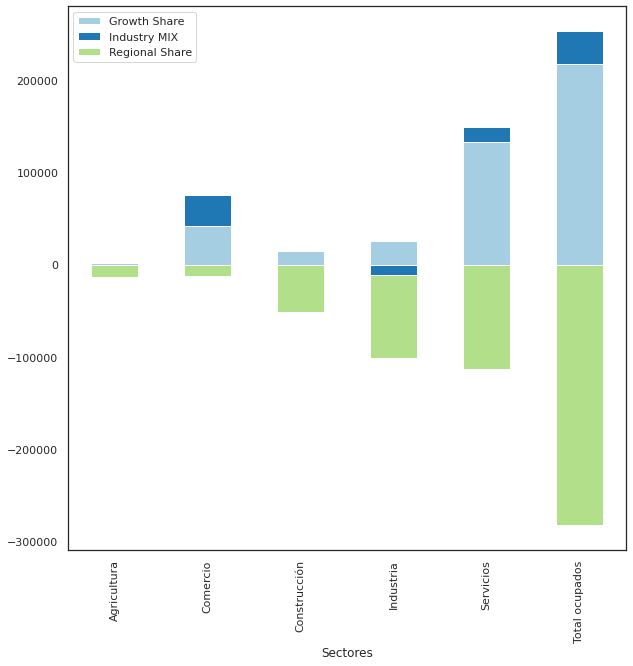

In [ ]:
sns.set(style='white', palette= "Paired")

x.set_index('Sectores').plot(kind='bar', stacked= True, figsize= (10,10)  )


In [ ]:
R= pd.read_excel('/content/libro 2.xlsx')

In [ ]:
R= R.rename(columns={'Argentina':'Sectores'})
R= R.drop(columns={2017,2021, '2017_R', '2021_R'})
#R= R.drop([4, 5])

In [ ]:
R

,Sectores,National Share,Industry MIX,Regional Shift
0,Admin_Pública,5317,22453,-12916
1,Administrativas,2813,-3037,-7198
2,Agricultura,302,-66,-4821
3,Agua_Saneamiento,191,5391,-9283
4,Alojamiento_Comidas,3209,-9989,-7015
5,Artes,1681,-8369,-12949
6,Comercio,11716,-8823,-89468
7,Construcción,2980,-4012,11626
8,Electricidad,292,2962,7176
9,Enseñanza,8298,8537,7938


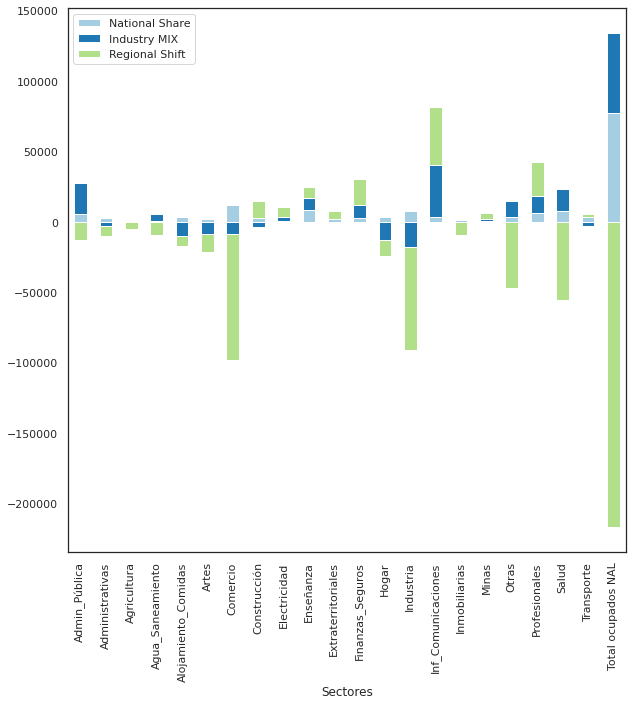

In [ ]:
sns.set(style='white', palette= "Paired")

R.set_index('Sectores').plot(kind='bar', stacked= True, figsize= (10,10)  )